# **WEB SCRAPPING & SENTIMENT ANALYSIS FOR EMIRATES**

# **NLP MINI PROJECT - GROUP 3**

### Yash Shirsath - 65
### Sachin Bade -
### Arya Sonawane -
### Aarohi Pisolkar - 46

### **WEB SCRAPPING PART**

In [ ]:
# Set Up Your Environment

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# Scraping Reviews from AirlineQuality

base_url = "https://www.airlinequality.com/airline-reviews/emirates"
pages = 10
page_size = 100

data = []
for i in range(1, pages + 1):

    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        data.append(para.get_text())

    print(f"   ---> {len(data)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["Data"] = data
df.head()

,Data
0,Not Verified | My parents and I travelled to L...
1,✅ Trip Verified | I've done 4 very long dist...
2,Not Verified | I had a horrible experience wi...
3,Not Verified | Business Class from Barcelona...
4,✅ Trip Verified | Mistreat unaccompanied min...


In [ ]:
df.to_csv("datareviews.csv")
df.head()

,Data
0,Not Verified | My parents and I travelled to L...
1,✅ Trip Verified | I've done 4 very long dist...
2,Not Verified | I had a horrible experience wi...
3,Not Verified | Business Class from Barcelona...
4,✅ Trip Verified | Mistreat unaccompanied min...


### **DATA PREPROCESSING**

In [ ]:
df.Data= df.Data.str.split('|',expand=True)[1]
df

,Data
0,My parents and I travelled to Lisbon via Duba...
1,I've done 4 very long distance flights with...
2,I had a horrible experience with Emirates as...
3,Business Class from Barcelona (using miles)...
4,Mistreat unaccompanied minor passengers. Tr...
...,...
995,Bangkok to Lisbon via Dubai. My business cla...
996,London to Chennai via Dubai. Extremely disap...
997,Singapore to Melbourne. Checking in early at...
998,My business journey from Germany to India too...


In [ ]:
import re
def clean(text):
    text = re.sub('[^A-Za-z]+]', ' ', str(text))
    return text

df['Clean Data'] = df['Data'].apply(clean)
df.head()

,Data,Clean Data
0,My parents and I travelled to Lisbon via Duba...,My parents and I travelled to Lisbon via Duba...
1,I've done 4 very long distance flights with...,I've done 4 very long distance flights with...
2,I had a horrible experience with Emirates as...,I had a horrible experience with Emirates as...
3,Business Class from Barcelona (using miles)...,Business Class from Barcelona (using miles)...
4,Mistreat unaccompanied minor passengers. Tr...,Mistreat unaccompanied minor passengers. Tr...


### **TOKENIZATION**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### **POS TAGGING**

In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist


df['POS Tagged'] = df['Clean Data'].apply(token_stop_pos)
df.head()

,Data,Clean Data,POS Tagged
0,My parents and I travelled to Lisbon via Duba...,My parents and I travelled to Lisbon via Duba...,"[(parents, n), (travelled, v), (Lisbon, n), (v..."
1,I've done 4 very long distance flights with...,I've done 4 very long distance flights with...,"[('ve, v), (done, v), (4, None), (long, r), (d..."
2,I had a horrible experience with Emirates as...,I had a horrible experience with Emirates as...,"[(horrible, a), (experience, n), (Emirates, n)..."
3,Business Class from Barcelona (using miles)...,Business Class from Barcelona (using miles)...,"[(Business, n), (Class, n), (Barcelona, n), ((..."
4,Mistreat unaccompanied minor passengers. Tr...,Mistreat unaccompanied minor passengers. Tr...,"[(Mistreat, n), (unaccompanied, v), (minor, a)..."


### **LEMMATIZATION (LEMMA)**

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew


df['Lemma'] = df['POS Tagged'].apply(lemmatize)
df.head()

,Data,Clean Data,POS Tagged,Lemma
0,My parents and I travelled to Lisbon via Duba...,My parents and I travelled to Lisbon via Duba...,"[(parents, n), (travelled, v), (Lisbon, n), (v...",parent travel Lisbon via Dubai A380 777-300E...
1,I've done 4 very long distance flights with...,I've done 4 very long distance flights with...,"[('ve, v), (done, v), (4, None), (long, r), (d...",'ve do 4 long distance flight Emirates say '...
2,I had a horrible experience with Emirates as...,I had a horrible experience with Emirates as...,"[(horrible, a), (experience, n), (Emirates, n)...",horrible experience Emirates mistreat aboard...
3,Business Class from Barcelona (using miles)...,Business Class from Barcelona (using miles)...,"[(Business, n), (Class, n), (Barcelona, n), ((...",Business Class Barcelona ( use mile ) Dubai ...
4,Mistreat unaccompanied minor passengers. Tr...,Mistreat unaccompanied minor passengers. Tr...,"[(Mistreat, n), (unaccompanied, v), (minor, a)...",Mistreat unaccompanied minor passenger . Tra...


In [ ]:
df[['Data','Lemma']]

,Data,Lemma
0,My parents and I travelled to Lisbon via Duba...,parent travel Lisbon via Dubai A380 777-300E...
1,I've done 4 very long distance flights with...,'ve do 4 long distance flight Emirates say '...
2,I had a horrible experience with Emirates as...,horrible experience Emirates mistreat aboard...
3,Business Class from Barcelona (using miles)...,Business Class Barcelona ( use mile ) Dubai ...
4,Mistreat unaccompanied minor passengers. Tr...,Mistreat unaccompanied minor passenger . Tra...
...,...,...
995,Bangkok to Lisbon via Dubai. My business cla...,Bangkok Lisbon via Dubai . business class up...
996,London to Chennai via Dubai. Extremely disap...,London Chennai via Dubai . Extremely disappo...
997,Singapore to Melbourne. Checking in early at...,Singapore Melbourne . Checking early Changi ...
998,My business journey from Germany to India too...,business journey Germany India take 38 hour ...


### **SENTIMENT ANALYSIS USING VADER**

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

In [ ]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Data,Clean Data,POS Tagged,Lemma,Sentiment,Analysis
0,My parents and I travelled to Lisbon via Duba...,My parents and I travelled to Lisbon via Duba...,"[(parents, n), (travelled, v), (Lisbon, n), (v...",parent travel Lisbon via Dubai A380 777-300E...,0.9735,Positive
1,I've done 4 very long distance flights with...,I've done 4 very long distance flights with...,"[('ve, v), (done, v), (4, None), (long, r), (d...",'ve do 4 long distance flight Emirates say '...,0.3903,Neutral
2,I had a horrible experience with Emirates as...,I had a horrible experience with Emirates as...,"[(horrible, a), (experience, n), (Emirates, n)...",horrible experience Emirates mistreat aboard...,-0.7845,Negative
3,Business Class from Barcelona (using miles)...,Business Class from Barcelona (using miles)...,"[(Business, n), (Class, n), (Barcelona, n), ((...",Business Class Barcelona ( use mile ) Dubai ...,0.9882,Positive
4,Mistreat unaccompanied minor passengers. Tr...,Mistreat unaccompanied minor passengers. Tr...,"[(Mistreat, n), (unaccompanied, v), (minor, a)...",Mistreat unaccompanied minor passenger . Tra...,-0.6818,Negative


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,486
Negative,392
Neutral,122


### **DATA VIZ USING MATPLOTLIB**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.patches.Wedge at 0x7ae2b2230250>,
 [Text(0.04836492521093943, 1.0989362283632933, 'Positive'),
  Text(-0.45581316233797403, -1.0011165571697713, 'Negative'),
  Text(1.2520509311940125, -0.5048449917511375, 'Neutral')],
 [Text(0.02638086829687605, 0.5994197609254327, '48.6%'),
  Text(-0.24862536127525853, -0.5460635766380569, '39.2%'),
  Text(0.788328364085119, -0.31786536517664216, '12.2%')])

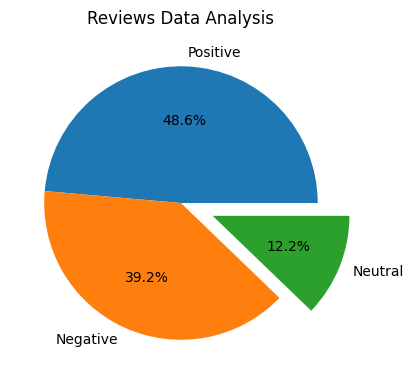

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 2)
plt.title('Reviews Data Analysis')
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("Fly_Emirates.csv")

### **DATA VIZ USING WORDCLOUD**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

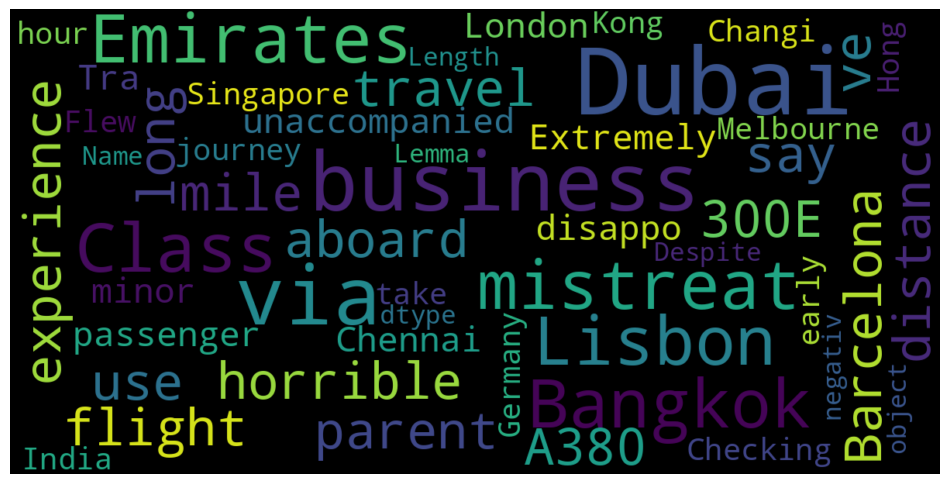

In [ ]:
import wordcloud
def show_wordcloud(data):
  wordcloud = WordCloud(
      background_color = 'black',
      stopwords=stopwords,
      max_words = 200,
      max_font_size = 40,
      scale = 3,
      random_state = 1)

  wordcloud = wordcloud.generate(str(data))

  fig = plt.figure(1, figsize = (12, 32))
  plt.axis('off')

  plt.imshow(wordcloud, interpolation = 'Bilinear')
  plt.show()

show_wordcloud(df.Lemma)